In [1]:
from test.test_maps import *

#draw_maps()

In [2]:
from test.test_sensor import *

In [3]:
map_n = 2

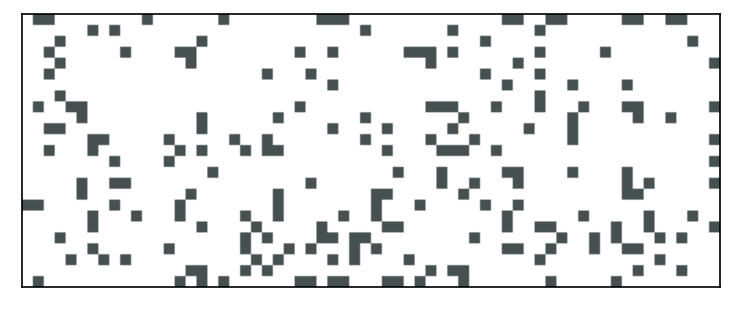

In [4]:
draw(sensor_maps[map_n])

In [5]:
from src.A_star_Replanning.a_star_replanning import *

In [6]:
f, p, open, closed = a_star_replanning(sensor_maps[map_n], (0,0), (23, 63))

In [7]:
f

True

In [8]:
len(p)

101

In [9]:
open.nodes_added

11742

In [10]:
closed.nodes_added

4194

In [11]:
from src.D_star_Lite.d_star_lite import *

In [12]:
f, p, open, closed = d_star_lite(sensor_maps[map_n], (0,0), (23, 63))

In [13]:
f

True

In [14]:
open.nodes_added

3083

In [15]:
closed.nodes_added

1493

In [16]:
len(p)

97

In [17]:
from src.LSS_LRTA_star.lss_lrta_star import *

In [18]:
f, p, open, closed = lss_lrta_star(sensor_maps[map_n], (0,0), (23, 63), lookahead=25)

(1, 1)
84
(1, 2)
83
(1, 3)
82
(1, 5)
80
(2, 6)
78
(2, 7)
77
(2, 8)
76
(2, 9)
75
(2, 11)
73
(2, 12)
72
(2, 13)
71
(2, 14)
70
(2, 15)
69
(1, 18)
67
(1, 19)
66
(1, 20)
65
(1, 21)
64
(1, 22)
63
(1, 23)
62
(1, 24)
61
(1, 25)
60
(1, 26)
59
(1, 27)
58
(1, 28)
57
(1, 29)
56
(1, 30)
55
(2, 31)
53
(2, 32)
52
(2, 33)
51
(2, 34)
50
(2, 35)
49
(2, 37)
47
(2, 39)
45
(2, 41)
43
(3, 42)
41
(3, 43)
40
(3, 44)
39
(3, 45)
38
(4, 47)
35
(4, 49)
33
(4, 50)
32
(4, 51)
31
(4, 52)
30
(4, 53)
29
(4, 54)
28
(4, 55)
27
(4, 56)
26
(4, 57)
25
(4, 58)
24
(4, 59)
23
(4, 60)
22
(4, 61)
21
(4, 62)
20
(5, 63)
18
(5, 62)
19
(9, 63)
14
(9, 62)
15
(12, 63)
11
(14, 63)
9
(16, 63)
7
(16, 62)
8
(20, 63)
3
(23, 63)
0


In [19]:
f

True

In [20]:
open.nodes_added

5679

In [21]:
closed.nodes_added

1449

In [22]:
len(p)

99

# Эксперименты

In [23]:
from test.test_rnd import test_rnd
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *

In [24]:
results_rnd_asr = test_rnd(a_star_replanning)

KeyboardInterrupt: 

In [ ]:
results_rnd_asr

In [ ]:
results_rnd_dsl = test_rnd(d_star_lite)

In [ ]:
results_rnd_dsl

In [ ]:
results_rnd_lssrta = test_rnd(lss_lrta_star)

In [ ]:
results_rnd_lssrta

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
vertex_acceses_rnd_asr = np.array(list(map(lambda x: x[0], results_rnd_asr.values())))-1
nodes_expanded_rnd_asr = np.array(list(map(lambda x: x[1], results_rnd_asr.values())))-1
vertex_acceses_rnd_dsl = np.array(list(map(lambda x: x[0], results_rnd_dsl.values())))-1
nodes_expanded_rnd_dsl = np.array(list(map(lambda x: x[1], results_rnd_dsl.values())))-1
vertex_acceses_rnd_lssrta = np.array(list(map(lambda x: x[0], results_rnd_lssrta.values())))-1
nodes_expanded_rnd_lssrta = np.array(list(map(lambda x: x[1], results_rnd_lssrta.values())))-1

In [ ]:
vertex_acceses_rnd_asr[vertex_acceses_rnd_asr < 0] = 0.0
nodes_expanded_rnd_asr[nodes_expanded_rnd_asr < 0] = 0.0
vertex_acceses_rnd_dsl[vertex_acceses_rnd_dsl < 0] = 0.0
nodes_expanded_rnd_dsl[nodes_expanded_rnd_dsl < 0] = 0.0
vertex_acceses_rnd_lssrta[vertex_acceses_rnd_lssrta < 0] = 0.0
nodes_expanded_rnd_lssrta[nodes_expanded_rnd_lssrta < 0] = 0.0

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(results_rnd_asr.keys(), vertex_acceses_rnd_asr*100, marker='o')
plt.plot(results_rnd_asr.keys(), vertex_acceses_rnd_dsl*100, marker='o')
plt.plot(results_rnd_lssrta.keys(), vertex_acceses_rnd_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-LRTA*'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(results_rnd_asr.keys(), nodes_expanded_rnd_asr*100, marker='o')
plt.plot(results_rnd_asr.keys(), nodes_expanded_rnd_dsl*100, marker='o')
plt.plot(results_rnd_lssrta.keys(), nodes_expanded_rnd_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-LRTA*'])
plt.xlabel('Enviroment size')
plt.ylabel('Percent of extra vertex expansions')
plt.show()

In [ ]:
from test.test_sensor import *
from src.A_star_Replanning.a_star_replanning import *
from src.D_star_Lite.d_star_lite import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
results_sensor_asr = test_sensor(a_star_replanning)
results_sensor_asr

In [ ]:
results_sensor_dsl = test_sensor(a_star_replanning)
results_sensor_dsl

In [ ]:
results_sensor_lssrta = test_sensor(lss_lrta_star)
results_sensor_lssrta

In [ ]:
vertex_acceses_sensor_asr = np.array(list(map(lambda x: x[0], results_sensor_asr.values())))-1
nodes_expanded_sensor_asr = np.array(list(map(lambda x: x[1], results_sensor_asr.values())))-1
vertex_acceses_sensor_dsl = np.array(list(map(lambda x: x[0], results_sensor_dsl.values())))-1
nodes_expanded_sensor_dsl = np.array(list(map(lambda x: x[1], results_sensor_dsl.values())))-1
vertex_acceses_sensor_lssrta = np.array(list(map(lambda x: x[0], results_sensor_lssrta.values())))-1
nodes_expanded_sensor_lssrta = np.array(list(map(lambda x: x[1], results_sensor_lssrta.values())))-1

vertex_acceses_sensor_asr[vertex_acceses_sensor_asr < 0] = 0.0
nodes_expanded_sensor_asr[nodes_expanded_sensor_asr < 0] = 0.0
vertex_acceses_sensor_dsl[vertex_acceses_sensor_dsl < 0] = 0.0
nodes_expanded_sensor_dsl[nodes_expanded_sensor_dsl < 0] = 0.0
vertex_acceses_sensor_lssrta[vertex_acceses_sensor_lssrta < 0] = 0.0
nodes_expanded_sensor_lssrta[nodes_expanded_sensor_lssrta < 0] = 0.0

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_asr*100, marker='o')
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_dsl*100, marker='o')
plt.plot(results_sensor_asr.keys(), vertex_acceses_sensor_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite', 'LSS-RTA*'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex accesses')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_asr*100, marker='o')
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_dsl*100, marker='o')
plt.plot(results_sensor_asr.keys(), nodes_expanded_sensor_lssrta*100, marker='o')
plt.legend(['A* replanning', 'D* Lite'])
plt.xlabel('Sensor radius')
plt.ylabel('Percent of extra vertex expansions')
plt.show()